# Office-based visit expenditure data  
### Look at feature space (plot)  
### Do early days model (examine random forest classifier and gradient boosted regressor)  
### Examine how feature tuning can improve model performance


## Import cls_lbl.csv file

In [3]:
cd ../Desktop/Insight/2012_MEPS/

/Users/bstankev/Desktop/Insight/2012_MEPS


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cls_lbl = pd.read_csv('cls_lbl.csv')

In [5]:
cls_lbl.head()

,Unnamed: 0,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,IPTEXP12,...,RTHLTH42,RTHLTH53,MNHLTH31,MNHLTH42,MNHLTH53,POVCAT12,POVLEV12,ageGrp,HLTHSTAT,MNHLTHSTAT
0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,3,2,1,5,450.75,4,2.333333,2.000000
1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,1,2,1,5,450.75,4,1.333333,1.333333
2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,1,2,2,5,450.75,1,1.666667,1.666667
3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,NaN,...,4,4,1,3,3,3,132.80,6,4.000000,2.333333
4,4,20005,102,20005102,490,127,NaN,NaN,NaN,NaN,...,3,1,1,2,1,3,132.80,3,1.666667,1.333333


In [6]:
cls_lbl.shape

(37242, 31)

## OBVEXP12 - Office-Based Expenditure data modeling 

1. Try both binning OBVEXP12 into a categorical classes as well as keeping it continuous
2. Reduce data to first-pass features only (e.g., Race, Sex, Age....) 
3. OBVGrp Ends up being helpful for viewing data but not for modeling (use OBVEXP12 instead)

In [8]:
# 1 = least total charges ->   10 = highest total charges
cls_lbl['OBVEXP12']

cls_lbl['OBVGrp'] = 1
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 0) & (cls_lbl['OBVEXP12'] <= 100), 'OBVGrp'] = 1 # Exp $1 - 500
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 101) & (cls_lbl['OBVEXP12'] <= 200), 'OBVGrp'] = 2 # Exp $501 - 1000 
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 201) & (cls_lbl['OBVEXP12'] <= 400), 'OBVGrp'] = 3 # Exp $1001 - 1500
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 401) & (cls_lbl['OBVEXP12'] <= 600), 'OBVGrp'] = 4 # Exp $1501 - 10,000
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 601) & (cls_lbl['OBVEXP12'] <= 1000), 'OBVGrp'] = 5 # Exp $10,001 - 20,000
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 1001) & (cls_lbl['OBVEXP12'] <= 3000), 'OBVGrp'] = 6 # Exp $20,001 - 30,000
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 3001) & (cls_lbl['OBVEXP12'] <= 5000), 'OBVGrp'] = 7 # Exp $30,001 - 40,000 
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 5001) & (cls_lbl['OBVEXP12'] <= 7000), 'OBVGrp'] = 8 # Exp $40,001 - 50,000 
cls_lbl.ix[(cls_lbl['OBVEXP12'] >= 7001) & (cls_lbl['OBVEXP12'] <= 9000), 'OBVGrp'] = 9 # Exp $50,001 - 60,000 
cls_lbl.ix[cls_lbl['OBVEXP12'] >= 9001, 'OBVGrp'] = 10 # Exp $60,001 + 

In [9]:
cls_lbl.head()

,Unnamed: 0,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,IPTEXP12,...,RTHLTH53,MNHLTH31,MNHLTH42,MNHLTH53,POVCAT12,POVLEV12,ageGrp,HLTHSTAT,MNHLTHSTAT,OBVGrp
0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,NaN,...,4,3,2,1,5,450.75,4,2.333333,2.000000,1
1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2,1,5,450.75,4,1.333333,1.333333,1
2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,2,2,5,450.75,1,1.666667,1.666667,1
3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,NaN,...,4,1,3,3,3,132.80,6,4.000000,2.333333,4
4,4,20005,102,20005102,490,127,NaN,NaN,NaN,NaN,...,1,1,2,1,3,132.80,3,1.666667,1.333333,2


In [10]:
# grad only necessary columns for this first pass model
obv = cls_lbl[['MNHLTHSTAT', 'HLTHSTAT', 'RACEV1X', 
                        'SEX', 'AGELAST', 'POVCAT12', 'POVLEV12', 'OBVEXP12','OBVGrp','ageGrp']]

obv.head()

,MNHLTHSTAT,HLTHSTAT,RACEV1X,SEX,AGELAST,POVCAT12,POVLEV12,OBVEXP12,OBVGrp,ageGrp
0,2.000000,2.333333,1,1,38,5,450.75,NaN,1,4
1,1.333333,1.333333,1,2,39,5,450.75,NaN,1,4
2,1.666667,1.666667,1,2,9,5,450.75,NaN,1,1
3,2.333333,4.000000,1,1,51,3,132.80,451,4,6
4,1.333333,1.666667,1,1,21,3,132.80,127,2,3


In [11]:
# get rid of NaN
obv = obv.dropna()

In [12]:
obv.shape

(23509, 10)

## Plots!! Look at shape of the features and expenditure data

1. overall OBVGrp distribution
2. sex x age x expenditure
3. poverty x expenditure
4. race x expenditure
5. age x expenditure

... and others

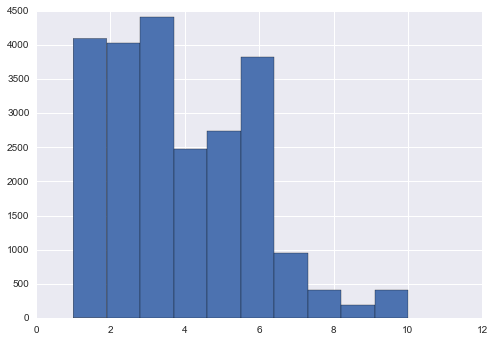

In [13]:
# see distribution of expenditure OBVGrp data
obv.OBVGrp.hist()

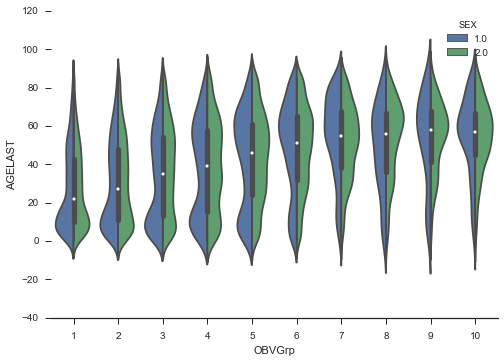

In [14]:
# Male = 1 ; Female = 2 
# Draw a nested violinplot and split the violins for easier comparison
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1)

sns.violinplot(x='OBVGrp', y="AGELAST", hue="SEX", data=obv, split=True, order = [1,2,3,4,5,6,7,8,9,10])
sns.despine(left=True)

# Groupby OBVGrp for plotting purposes

In [15]:
gbOBV=obv.groupby('OBVGrp')
gbOBV = gbOBV.mean()

In [16]:
gbOBV = gbOBV.reset_index()
gbOBV.head()

,OBVGrp,MNHLTHSTAT,HLTHSTAT,RACEV1X,SEX,AGELAST,POVCAT12,POVLEV12,OBVEXP12,ageGrp
0,1,1.858445,2.066097,1.572894,1.536752,27.704029,2.912821,245.031429,62.170208,3.233700
1,2,1.863719,2.084451,1.584948,1.528068,30.667660,3.167412,283.301110,147.610532,3.529309
2,3,1.935676,2.200529,1.573696,1.557143,34.998866,3.320181,312.495002,289.776190,3.961905
3,4,1.988143,2.272164,1.580841,1.548100,38.050121,3.513339,342.500732,494.474535,4.251819
4,5,2.086523,2.425204,1.499818,1.614291,42.652570,3.506380,351.310408,776.820999,4.704703


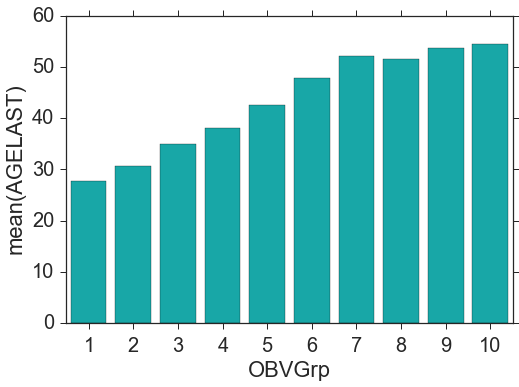

In [18]:
# Age x OBVGrp (10 = most spending)
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

ax = sns.barplot(x="OBVGrp", y="AGELAST", data=gbOBV,color='c')

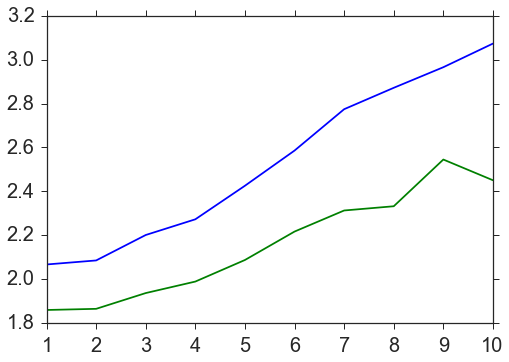

In [24]:
# plot of Mental and Physical Health status x OBVGrp spending

# both survey questions correlated feeling 'worse' with spending more on healthcare
plt.plot(gbOBV.OBVGrp,gbOBV.MNHLTHSTAT, c='g') # green
plt.plot(gbOBV.OBVGrp,gbOBV.HLTHSTAT, c='b') # blue

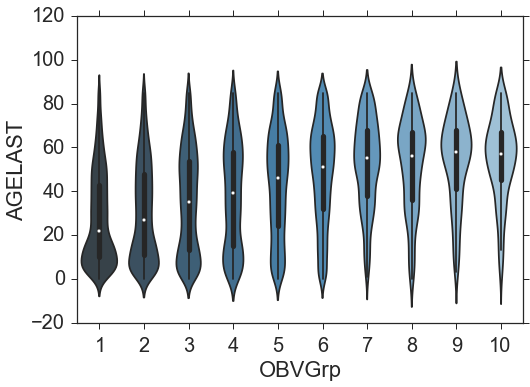

In [25]:
# Age x OBVGrp expenditure

# older people in higher expenditure groups
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)


sns.violinplot(x="OBVGrp", y="AGELAST", data=obv, palette="Blues_d", order=[1,2,3,4,5,6,7,8,9,10])

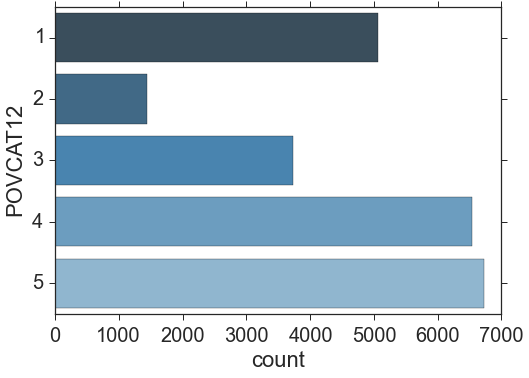

In [26]:
# Plot of number of people in each poverty category
# seen this in other notebook, but this is only for office-based spending subset
# survey oversampled poor and well off people
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)


sns.countplot(y="POVCAT12", data=obv, palette="Blues_d", order = [1,2,3,4,5])

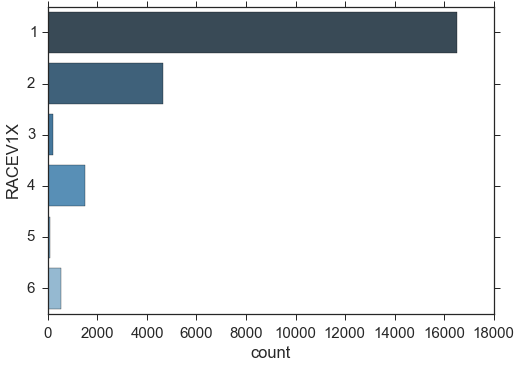

In [27]:
# Plot of number of people in each race category
# seen this in other notebook, but this is only for office-based spending subset
# survey oversampled black and white people
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5)


sns.countplot(y="RACEV1X", data=obv, palette="Blues_d", order = [1,2,3,4,5,6])

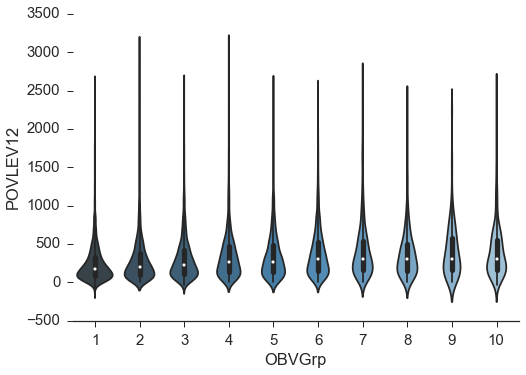

In [28]:
# poverty level x OBVGrp
# poorer people are over represented in the higher spending categories
sns.violinplot(x='OBVGrp', y="POVLEV12", data=obv, split=True, palette='Blues_d', order=[1,2,3,4,5,6,7,8,9,10])
sns.despine(left=True)

# Time to try some modeling

1. one-hot encode categorical (nominal) features
2. standardize continuous features
3. inspect classification vs. regression for this dataset

In [30]:
# classes are either with Office-based visits categorical or continuous
# features are either with Age continuous or Age categorical
X = obv[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12']]
X_cat = obv[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'ageGrp','POVCAT12','POVLEV12']]
y_cat = obv['OBVGrp'].values
y_con = obv['OBVEXP12'].values

### make sure my created variables are all equal in length

In [31]:
assert len(y_cat) == len(X)

In [32]:
assert len(y_con) == len(X)

In [33]:
assert len(y_cat) == len(X_cat)

In [34]:
assert len(y_con) == len(X_cat)

### Categorical classes First

working on X_cat & y_cat first

1. create dummy variables for categorical (nominal) features
2. re-scale continuous and categorical (ordinal) features
3. random forest classifier w/ suggested hyperparameters
4. accuracy output

In [35]:
# one hot encoding of categorical (nominal) features 
from sklearn.preprocessing import OneHotEncoder
x1 = X_cat[['RACEV1X', 'SEX']]
x1 = x1.values
enc = OneHotEncoder()
enc.fit(x1)

x2 = enc.transform(x1).toarray()

In [36]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

ystd_scale = preprocessing.StandardScaler().fit(X_cat[['MNHLTHSTAT','HLTHSTAT','ageGrp','POVLEV12','POVCAT12']])
ydf_std = ystd_scale.transform(obv[['MNHLTHSTAT','HLTHSTAT','ageGrp','POVLEV12','POVCAT12']])

In [37]:
x4 = np.append(x2,ydf_std, axis=1)

In [38]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# split the data
x_train, x_test, y_train, y_test = train_test_split(x4, y_cat, random_state=42)

clf2 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=100, 
                              max_features=0.5, max_depth=7, min_samples_leaf=2)
clf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=2, n_estimators=100, n_jobs=100,
            oob_score=True, random_state=None, verbose=0)

In [44]:
# compute and output accuracy of test and train data
pred = clf2.predict(x_test)
pred_train = clf2.predict(x_train)
pscore = metrics.accuracy_score(y_test, pred)
pscore_train = metrics.accuracy_score(y_train, pred_train)

print("Test accuracy {0}:".format(pscore))
print("Test accuracy {0}:".format(pscore_train))

Test accuracy 0.251275944199:
Test accuracy 0.296409732857:


## Continuous class Second
### examine different GBRT tunings

working on X_cat & y_con second

1. create dummy variables for categorical (nominal) features
2. re-scale continuous and categorical (ordinal) features
3. Gradient Boosted Regression Tree + Hyperparameter tuning (GridSearchCV) + GBRT pt. 2
4. accuracy output


* probably don't want to do GridSearchCV again, try RandomSearchCV -> it's faster

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.grid_search import GridSearchCV

rng = np.random.RandomState(42)

In [46]:
# split the data
xg_train, xg_test, yg_train, yg_test = train_test_split(x4, y_con, random_state=rng)

## GBRT classifier w/ default parameters

In [47]:
clf_3 = GradientBoostingRegressor(n_estimators=3000).fit(xg_train,yg_train)

In [113]:
param_grid = {'learning_rate' : [0.1,0.05,0.02,0.01],
               'max_depth' : [1,2,3,4,5,6,7],
               'min_samples_leaf' : [3,5,9,17],
               'max_features' : [1.0,0.3,0.1]}

clf_1 = GradientBoostingRegressor(n_estimators=3000)
gs_cv = GridSearchCV(clf_1,param_grid).fit(xg_train,yg_train)

In [114]:
gs_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': 0.3,
 'min_samples_leaf': 5}

## GBRT with parameters from GridSearchCV

In [48]:
#oob_score=True ?? 
clf_2 = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
clf_2.fit(xg_train,yg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

## Performance of GBRT with default parameters

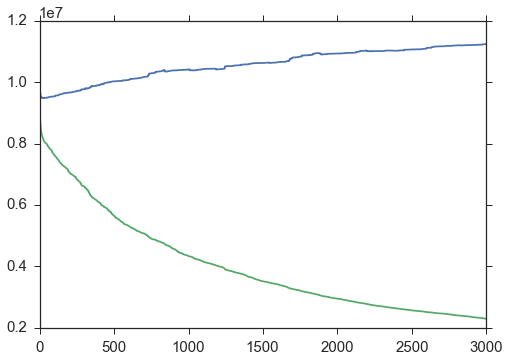

In [49]:
# This is the initial tree
# look at overfitting between test and training set x error 

test_score = np.empty(len(clf_3.estimators_))
for i, pred in enumerate(clf_3.staged_predict(xg_test)):
    test_score[i] = clf_3.loss_(yg_test,pred)

plt.plot(np.arange(3000) + 1, test_score, label='Test')
plt.plot(np.arange(3000) + 1, clf_3.train_score_, label='Train')

## Performance of GBRT with GridSearchCV parameters

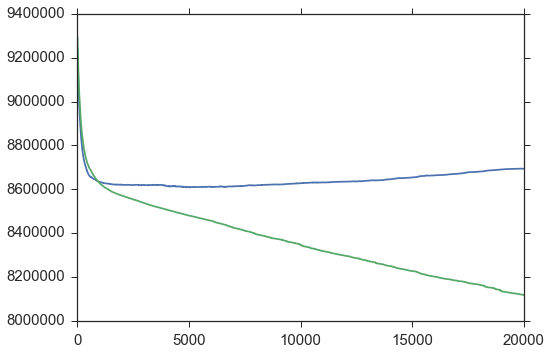

In [117]:
test_score = np.empty(len(clf_2.estimators_))
for i, pred in enumerate(clf_2.staged_predict(xg_test)):
    test_score[i] = clf_2.loss_(yg_test,pred)

plt.plot(np.arange(20000) + 1, test_score, label='Test')
plt.plot(np.arange(20000) + 1, clf_2.train_score_, label='Train')

### GridSearchCV parameters are better!

## Look at MAE difference between two GBRT classifiers
 

In [50]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(yg_test, clf_3.predict(xg_test))
print('Non-tuned GBRT MAE: %.4f' % mae)

mae2 = mean_absolute_error(yg_test, clf_2.predict(xg_test))
print('Tuned GBRT MAE: %.4f' % mae2)

Non-tuned GBRT MAE: 1244.7030
Tuned GBRT MAE: 1173.6931


### GridSearchCV parameters reduce the MAE 